<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Light_Curve_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytransit celerite emcee corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.1/698.1 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.5 MB/s eta 0:00:00


In [2]:
from pytransit import QuadraticModel
# from pytransit import UniformModel
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

/usr/local/lib/python3.10/dist-packages/pytools/persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Earth Light Curve

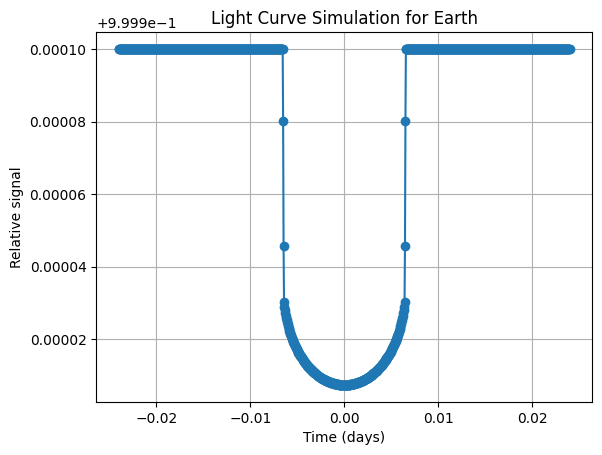

In [60]:
t0 = 0.                        #time of inferior conjunction in days
per = 365.25                     #orbital period in days
rp_rs = 6371/696000              #planet radius / stellar radius ratio
ars =  1.496e11/696000                   #semi-major axis / stellar radius ratio
inc =  (90*u.deg).to(u.rad).value      #orbital inclination (in radians)
ecc = 0.                       #eccentricity
w = (90*u.deg).to(u.rad).value      #longitude of periastron (in radians)
gamma = [0.28, 0.01]                 #limb darkening coefficients [u1, u2]

ttvp = 0/86400        #TTV of object in (days)
t = np.linspace(-0.001, 0.001, 1000)  #times at which to calculate light curve (days)
####################
tm = QuadraticModel() # a model that uses two limb-darkening coefficients
tm.set_data(t)
####################
lc_Earth  = tm.evaluate(k=rp_rs, ldc=gamma, t0=t0, p=per, a=ars, i=inc, e=ecc, w=w)
plt.figure('lcEarth')
plt.plot(t*24 + ttvp, lc_Earth, '-o')
plt.grid(True)
plt.title('Light Curve Simulation for Earth')
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.show();

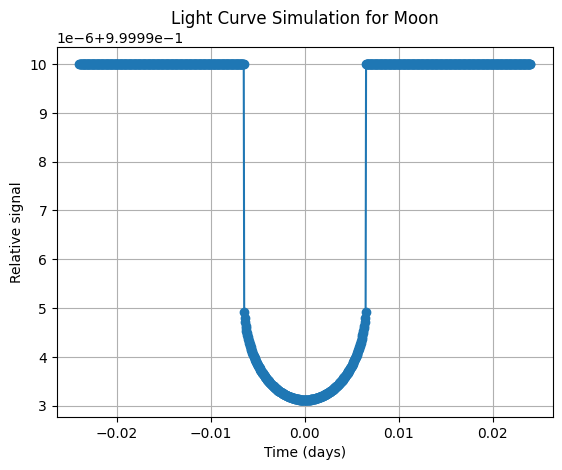

In [59]:
t0 = 0.                        #time of inferior conjunction in days
per = 365.25                     #orbital period in days
rp_rs = 1737.4/696000              #planet radius / stellar radius ratio
ars =  1.496e11/696000                   #semi-major axis / stellar radius ratio
inc =  (90*u.deg).to(u.rad).value      #orbital inclination (in radians)
ecc = 0.                       #eccentricity
w = (90*u.deg).to(u.rad).value      #longitude of periastron (in radians)
gamma = [0.28, 0.01]                 #limb darkening coefficients [u1, u2]

ttvm = 0/86400        #TTV of object in (days)
t = np.linspace(-0.001, 0.001, 1000)  #times at which to calculate light curve (days)
####################
tm = QuadraticModel() # a model that uses two limb-darkening coefficients
tm.set_data(t)
####################
lc_Moon = tm.evaluate(k=rp_rs, ldc=gamma, t0=t0, p=per, a=ars, i=inc, e=ecc, w=w)
plt.figure('lcMoon')
plt.plot(t*24 + ttvm, lc_Moon, '-o')
plt.grid(True)
plt.title('Light Curve Simulation for Moon')
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.show();

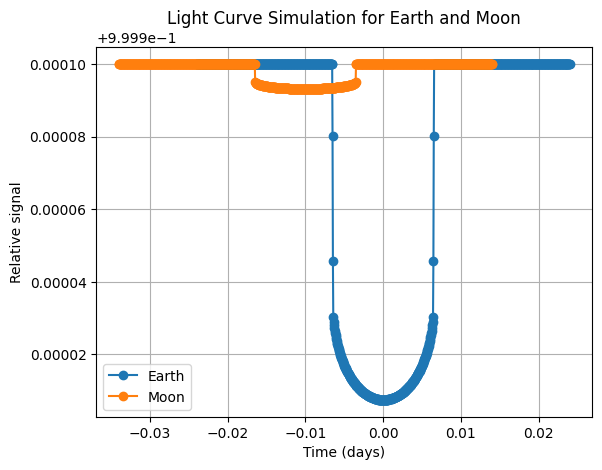

In [61]:
plt.plot(t*24, lc_Earth, '-o', label = 'Earth')
plt.plot(t*24 - 0.01, lc_Moon, '-o', label = 'Moon')
plt.legend()
plt.grid(True)
plt.title('Light Curve Simulation for Earth and Moon')
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.show();

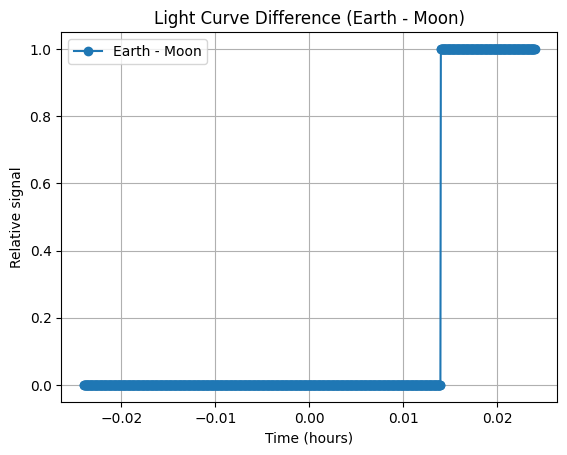

In [69]:
from scipy.interpolate import interp1d

# Assuming t, lc_Earth, and lc_Moon are already defined
# Offset the Moon light curve by -0.01 days in time units
time_shift = 0.01 / 24  # This is the offset in days

# Interpolate the lc_Moon light curve to match the t grid of lc_Earth after the time shift
t_shifted = t - time_shift
interpolator = interp1d(t_shifted, lc_Moon, bounds_error=False, fill_value=0)
lc_Moon_shifted = interpolator(t)

# Subtract the two light curves
lc_difference = lc_Earth - lc_Moon_shifted

# Plot the results
plt.figure('Light Curve Difference')
plt.plot(t*24, lc_difference, '-o', label='Earth - Moon')
plt.grid(True)
plt.title('Light Curve Difference (Earth - Moon)')
plt.ylabel('Relative signal')
plt.xlabel('Time (hours)')
plt.legend()
plt.show()
